# Model
Create neural network using Keras & TensorFlow

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import backend as K

Using TensorFlow backend.


## Define L1 Loss function

In [2]:
def smooth_L1_loss(y_true, y_pred):
    THRESHOLD = K.variable(1.0)
    mae = K.abs(y_true - y_pred)
    flag = K.greater(mae, THRESHOLD)
    loss = K.mean(K.switch(flag, (mae - 0.5), K.pow(mae, 2)), axis=-1)
    return loss

## Data Preparation

In [3]:
X_train = pd.read_csv('processed data/predictors_train.csv', index_col = 0)
y_train = pd.read_csv('processed data/target_train.csv', names = ['price'])

X_test = pd.read_csv('processed data/predictors_test.csv', index_col = 0)
y_test = pd.read_csv('processed data/target_test.csv', names = ['price'])

In [ ]:
amzn = pd.read_cvs('normalized data/amzn.csv')

In [4]:
fft_cols = ['fft 3', 'fft 6', 'fft 9']  # list of fourier transform column names

X_train.drop(fft_cols, axis=1, inplace=True)
X_test.drop(fft_cols, axis=1, inplace=True)

In [5]:
#convert testing/training sets to numpy arrays
X_train = np.array(X_train.values)
y_train = np.array(y_train.values)

X_test = np.array(X_test.values)
y_test = np.array(y_test.values)

In [6]:
#reshape data for input into the LSTM model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [18]:
X_test

array([[[2.06941010e+07, 6.29543000e+01, 6.22790000e+01, ...,
         1.11543496e+04, 2.25783008e+03, 4.75000000e-01]],

       [[2.13399690e+07, 6.27757000e+01, 6.24243000e+01, ...,
         1.12465400e+04, 2.27075000e+03, 5.18000000e-01]],

       [[2.48759680e+07, 6.26414000e+01, 6.25233000e+01, ...,
         1.12476904e+04, 2.26900000e+03, 5.08000000e-01]],

       ...,

       [[5.16347930e+07, 1.00711400e+02, 1.06007100e+02, ...,
         1.12040898e+04, 2.46769995e+03, 2.38000000e+00]],

       [[4.94985090e+07, 1.00467100e+02, 1.05755200e+02, ...,
         1.12853096e+04, 2.48883008e+03, 2.34800000e+00]],

       [[3.81693120e+07, 9.99557000e+01, 1.05433800e+02, ...,
         1.12909502e+04, 2.48573999e+03, 2.32800000e+00]]])

## Build, Train, and Test Model

In [7]:
sequence_length = 1  # number of days before predicting
n_features = X_train.shape[2]  # number of features in the data set
time_step = 1  # number of samples

In [33]:
model = Sequential()
#2 layer stateful LSTM with 125 nodes and Xavier (glorot_uniform) activation and L1 loss function
model.add(LSTM(5, batch_input_shape=(sequence_length, time_step, n_features),
                       kernel_initializer='random_uniform', return_sequences=True))
model.add(LSTM(2))
#add dropout layer here
#add dense layer here
#add dropout layer here
model.add(Dense(1))  # single node dense output layer with prediction
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()  # show model summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (1, 1, 5)                 380       
_________________________________________________________________
lstm_10 (LSTM)               (1, 2)                    64        
_________________________________________________________________
dense_5 (Dense)              (1, 1)                    3         
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________


In [34]:
#fit model to training data
model.fit(X_train, y_train, epochs=2, batch_size=1, shuffle=False)

Epoch 1/2
1760/1760 [==============================] - 21s 12ms/step - loss: 941.8994
Epoch 2/2
1760/1760 [==============================] - 16s 9ms/step - loss: 667.4509


In [35]:
prd = model.predict(X_train, batch_size=1)

In [11]:
mean_squared_error(y_test, prd)

1042.0553508894266

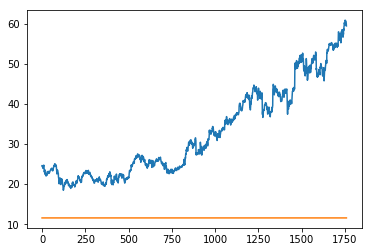

In [36]:
import matplotlib.pyplot as plt
plt.plot(y_train)
plt.plot(prd)
plt.show()